## Reference: https://www.twblogs.net/a/5b7a95f72b7177392c966121

## 匯入套件

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 讀取資料

In [3]:
originalData=pd.read_csv(r'C:\Users\User\Desktop\程式\AI-python\Practice\Regression\Regression.csv',engine='python')
changeRateData=pd.read_csv(r'C:\Users\User\Desktop\程式\AI-python\Practice\Regression\Regression_change_rate.csv',engine='python')

In [4]:
print('originalData Shape:',originalData.shape)
originalData.head()

originalData Shape: (79, 10)


,Year,黃金價格,美元指數,日經指數225,美債殖利率,通膨(%),原油(WTI),道瓊工業指數,黃金儲備量($mn),日圓
0,2019 Q4,1514.75,96.389999,"23,656.62",1.919,2.3,61.06,"28,538.44",1677871.85,108.62
1,2019 Q3,1485.30,99.379997,"21,755.84",1.668,1.7,54.07,"26,916.83",1631453.16,108.08
2,2019 Q2,1409.00,96.129997,"21,275.92",2.007,1.6,58.47,"26,599.96",1541387.07,107.89
3,2019 Q1,1295.40,97.279999,"21,205.81",2.407,1.9,60.14,"25,928.68",1409892.83,110.86
4,2018 Q4,1279.00,96.169998,"20,014.77",2.686,1.9,45.41,"23,327.46",1389471.56,109.58


In [5]:
print('changeRateData Shape:', changeRateData.shape)
changeRateData.head()

changeRateData Shape: (79, 10)


,Year,黃金價格,美元指數,日經指數225,美債殖利率,通膨(%),原油(WTI),道瓊工業指數,黃金儲備量($mn),日圓
0,2019 Q4,0.019828,-0.030087,0.087369,0.150480,0.352941,0.129277,0.060245,0.028452,0.004996
1,2019 Q3,0.054152,0.033808,0.022557,-0.168909,0.062500,-0.075252,0.011912,0.058432,0.001761
2,2019 Q2,0.087695,-0.011822,0.003306,-0.166182,-0.157895,-0.027769,0.025889,0.093265,-0.026791
3,2019 Q1,0.012823,0.011542,0.059508,-0.103872,0.000000,0.324378,0.111509,0.014697,0.011681
4,2018 Q4,0.077279,0.010295,-0.170202,-0.123654,-0.173913,-0.380068,-0.118331,0.083017,-0.036151


## 反轉資料，讓早期資料在前面

In [6]:
originalData=originalData.iloc[::-1]
originalData=originalData.reset_index(drop=True)


changeRateData=changeRateData.iloc[::-1]
changeRateData=changeRateData.reset_index(drop=True)


In [7]:
originalData=originalData.dropna()
changeRateData=changeRateData.dropna()

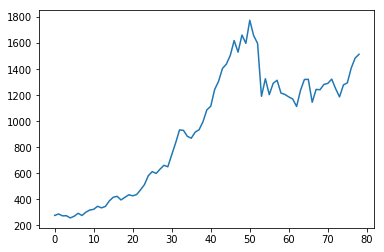

In [8]:
plt.plot(originalData['黃金價格'])

## 基本統計數據

In [9]:
changeRateData.describe()

,黃金價格,美元指數,日經指數225,美債殖利率,通膨(%),原油(WTI),道瓊工業指數,黃金儲備量($mn),日圓
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.025132,-0.000591,0.006240,-0.003416,-0.094815,0.029013,0.014333,0.026621,0.001748
std,0.069587,0.041725,0.104310,0.157732,0.837829,0.170644,0.074672,0.083917,0.054060
min,-0.254184,-0.105463,-0.246307,-0.420214,-5.000000,-0.556836,-0.191165,-0.252454,-0.145431
25%,-0.016919,-0.027288,-0.082137,-0.108793,-0.192780,-0.056328,-0.024889,-0.024926,-0.030149
50%,0.029316,-0.000689,0.016834,-0.005139,-0.025353,0.035586,0.020262,0.035049,0.001370
75%,0.074725,0.020076,0.074258,0.081016,0.239583,0.123511,0.066379,0.076774,0.034078
max,0.166981,0.097851,0.227992,0.530663,2.500000,0.407370,0.149790,0.378087,0.153444


## 相關性

In [10]:
changeRateDataCorr = changeRateData.corr()
changeRateDataCorr

,黃金價格,美元指數,日經指數225,美債殖利率,通膨(%),原油(WTI),道瓊工業指數,黃金儲備量($mn),日圓
黃金價格,1.000000,-0.404878,-0.227556,-0.310711,-0.024428,0.147240,-0.071745,0.855882,-0.559017
美元指數,-0.404878,1.000000,0.003840,-0.046710,-0.254712,-0.230989,-0.207516,-0.331582,0.474645
日經指數225,-0.227556,0.003840,1.000000,0.606829,0.167673,0.279466,0.647189,-0.227860,0.479023
美債殖利率,-0.310711,-0.046710,0.606829,1.000000,0.060347,0.440863,0.452215,-0.261780,0.503857
通膨(%),-0.024428,-0.254712,0.167673,0.060347,1.000000,0.169081,0.255133,-0.034401,-0.157821
原油(WTI),0.147240,-0.230989,0.279466,0.440863,0.169081,1.000000,0.274400,0.128391,0.109930
道瓊工業指數,-0.071745,-0.207516,0.647189,0.452215,0.255133,0.274400,1.000000,-0.067419,0.215894
黃金儲備量($mn),0.855882,-0.331582,-0.227860,-0.261780,-0.034401,0.128391,-0.067419,1.000000,-0.465480
日圓,-0.559017,0.474645,0.479023,0.503857,-0.157821,0.109930,0.215894,-0.465480,1.000000


Text(0.5,1,'Correlation Heatmap')

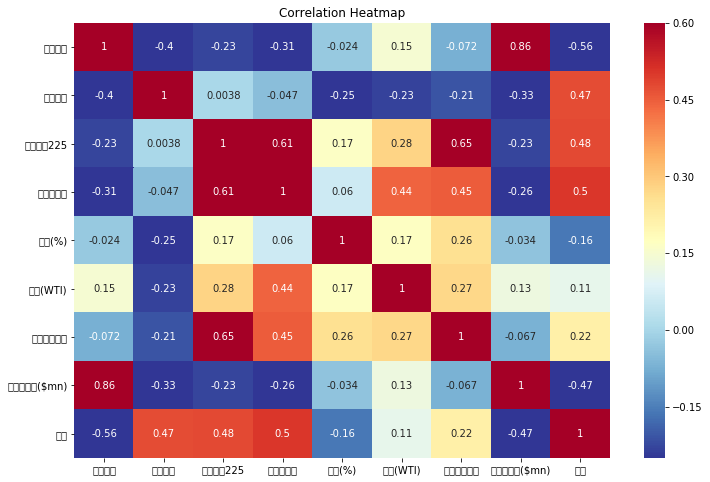

In [11]:
plt.figure(figsize = (12, 8))

# Heatmap of correlations
sns.heatmap(changeRateDataCorr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

## 通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係

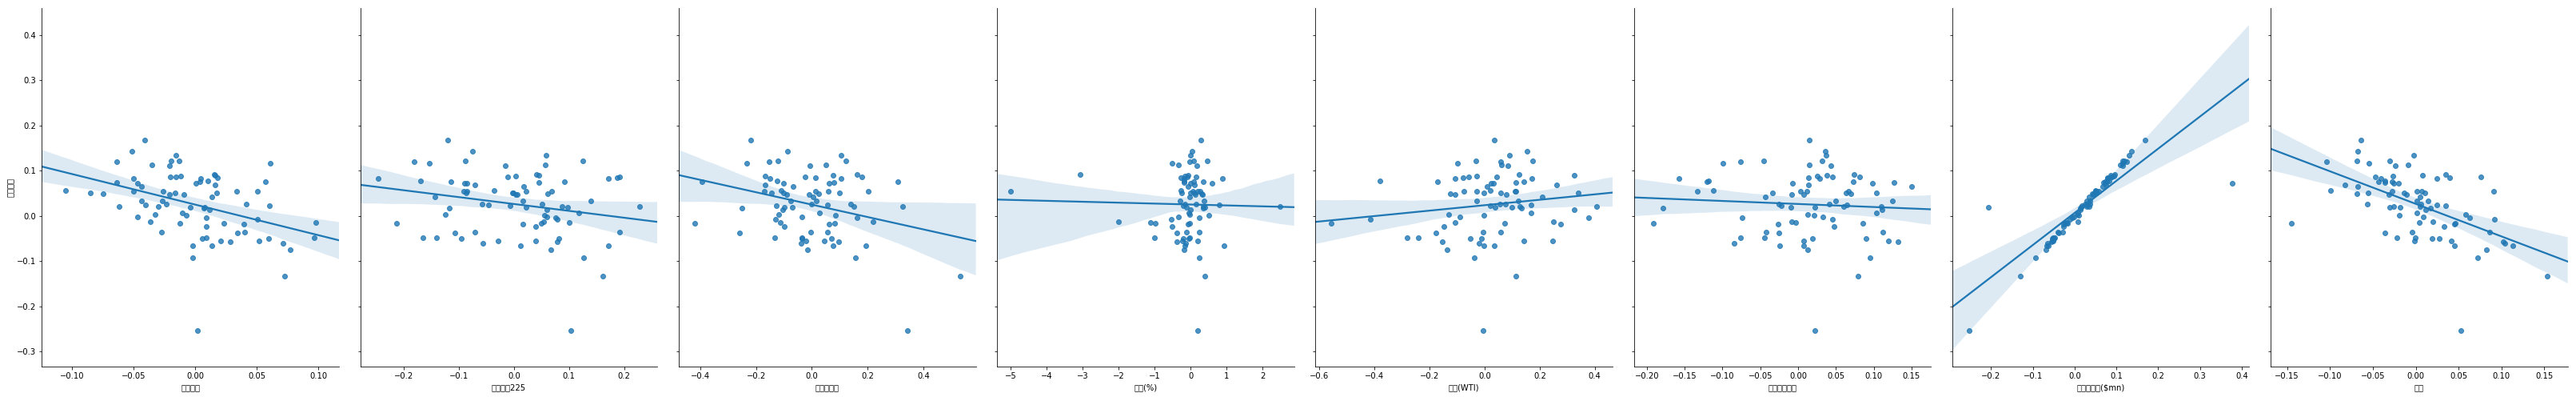

In [12]:
sns.pairplot(changeRateData, x_vars=[ '美元指數', '日經指數225', '美債殖利率', '通膨(%)', '原油(WTI)',
        '道瓊工業指數', '黃金儲備量($mn)', '日圓'], y_vars='黃金價格', size=7, aspect=0.8, kind='reg')  
plt.show()


## 多元線性回歸模型

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


自變量---源數據: (78, 9) ；  訓練集: (62, 9) ；  測試集: (16, 9)
因變量---源數據: (78,) ；  訓練集: (62,) ；  測試集: (16,)
0 0.0
1 0.0
2 -0.0
3 -0.0
4 0.0
5 0.0
6 -0.0
7 -0.0
8 0.0


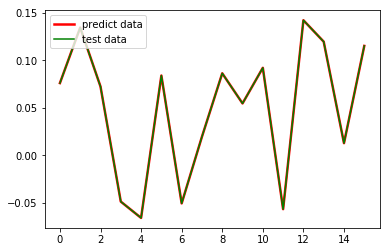

In [13]:
#拆分訓練集和測試集
X_train,X_test,Y_train,Y_test = train_test_split(changeRateData.ix[:,1:],changeRateData['黃金價格'],train_size=0.8)
#new_examDf.ix[:,:2]取了數據中的前兩列爲自變量，此處與單變量的不同
 
print("自變量---源數據:",changeRateData.ix[:,1:].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",changeRateData['黃金價格'].shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)

#調用線性規劃包
model = LinearRegression()

model.fit(X_train,Y_train)#線性迴歸訓練

a  = model.intercept_#截距
b = model.coef_#迴歸係數

for i in range(9):
    print(i,round(b[i],-5))

Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測

plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線

In [22]:
import statsmodels.api as sm
model = sm.OLS(changeRateData['黃金價格'],changeRateData.ix[:,2:]).fit()
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                   黃金價格   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              35.20
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    1.30e-21
Time:                        16:41:13   Log-Likelihood:                          155.81
No. Observations:                  78   AIC:                                     -295.6
Df Residuals:                      70   BIC:                                     -276.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
